In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bunch=datasets.load_boston()

In [3]:
print(bunch.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
print(bunch.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
df=pd.DataFrame(bunch.data)
df.columns=bunch.feature_names

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
price=pd.DataFrame(bunch.target)
price.columns=['price']
price.describe()

,price
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [29]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

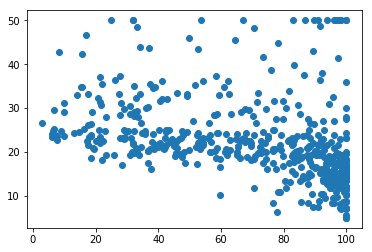

In [42]:
plt.scatter(df['AGE'],price['price'],marker='o')

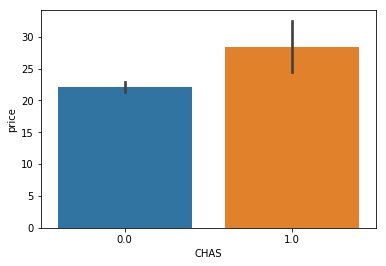

In [41]:
sns.barplot(df['CHAS'],price['price'])   #rive is factor 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E586E48>,
      dtype=object)

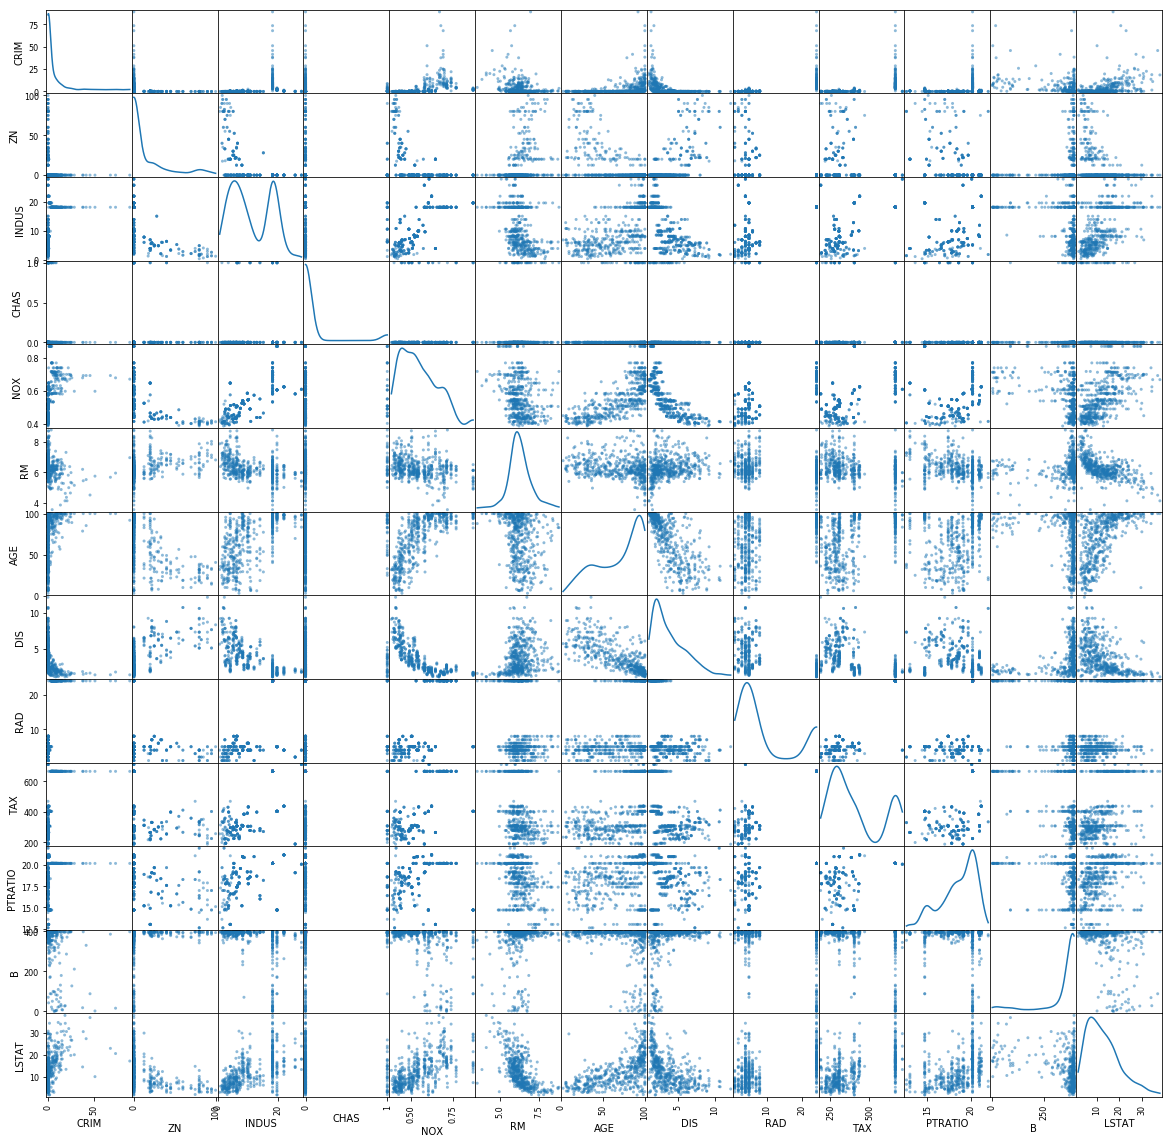

In [67]:
pd.plotting.scatter_matrix(df,figsize=(20,20),diagonal='kde')

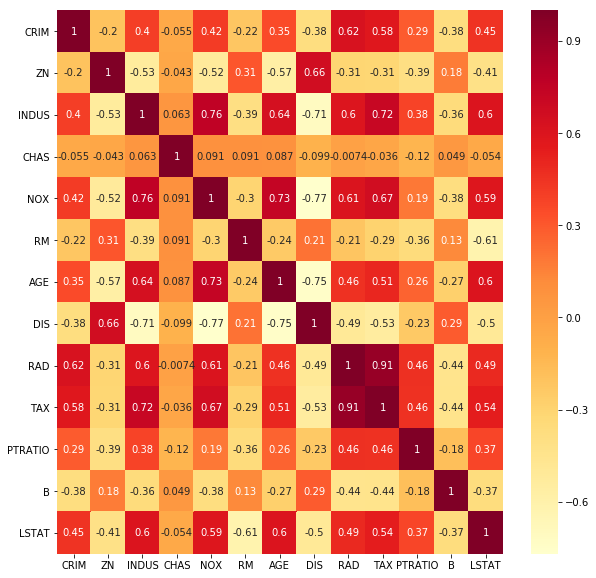

In [75]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.YlOrRd)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(df,price,test_size=0.1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print([lm.intercept_,lm.coef_])

[array([37.1980528]), array([[-1.18541534e-01,  4.26509504e-02,  2.54415258e-02,
         2.72173530e+00, -1.84061408e+01,  3.75332547e+00,
         2.80223726e-03, -1.43613015e+00,  3.36897319e-01,
        -1.25822384e-02, -9.70983457e-01,  9.79777870e-03,
        -5.44795543e-01]])]


In [18]:
r2_score(lm.predict(x_train),y_train)

0.6412089991154895

In [19]:
mean_squared_error(lm.predict(x_test),y_test)

14.370488702778918

In [53]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [54]:
x=sm.add_constant(df)

In [120]:
lm2=sm.OLS(y_train,x_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     775.6
Date:                Mon, 18 Mar 2019   Prob (F-statistic):          1.24e-294
Time:                        11:57:19   Log-Likelihood:                -1380.5
No. Observations:                 455   AIC:                             2787.
Df Residuals:                     442   BIC:                             2841.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0938      0.035     -2.648      0.008      -0.163      -0.024
ZN             0.0474      0.016      3.015      0.003       0.017       0.078
INDUS         -0.0216      0.071     -0.307      0.759      -0.160       0.117
CHAS           2.9498      0.957      3.081      0.002       1.068       4.831
NOX           -2.9617      3.650     -0.811      0.418     -10.136       4.212
RM             5.9447      0.329     18.055      0.000       5.298       6.592
AGE           -0.0043      0.015     -0.281      0.779      -0.034       0.026
DIS           -0.9477      0.211     -4.496      0.000      -1.362      -0.533
RAD            0.1483      0.074      2.003      0.046       0.003       0.294
TAX           -0.0067      0.004     -1.516      0.130      -0.015       0.002
PTRATIO       -0.4241      0.120     -3.549      0.000      -0.659      -0.189
B              0.0146      0.003      5.090      0.000       0.009       0.020
LSTAT         -0.4294      0.055     -7.850      0.000      -0.537      -0.322
==============================================================================
Omnibus:                      176.524   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.304
Skew:                           1.539   Prob(JB):                    2.40e-243
Kurtosis:                      10.033   Cond. No.                     8.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:

mean_squared_error(lm2.fittedvalues,y_train)

25.289848686465344

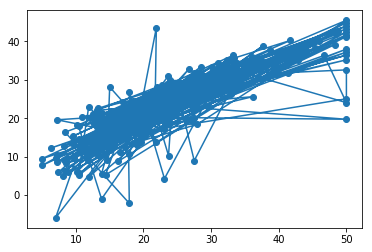

In [123]:
plt.plot(y_train,lm2.fittedvalues,marker='o')

(array([  1.,   2.,  18., 186., 185.,  46.,   8.,   5.,   2.,   2.]),
 array([-4.24431222, -3.22657951, -2.20884681, -1.19111411, -0.1733814 ,
         0.8443513 ,  1.862084  ,  2.87981671,  3.89754941,  4.91528211,
         5.93301482]),
 <a list of 10 Patch objects>)

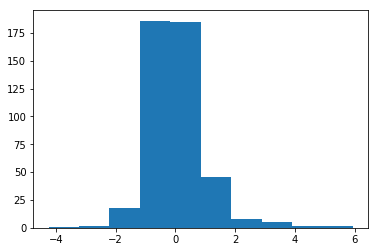

In [124]:
plt.hist(lm2.resid_pearson)

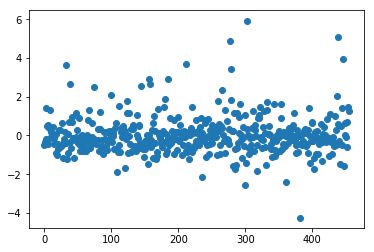

In [125]:
plt.scatter(range(len(lm2.resid_pearson)),lm2.resid_pearson)  #check residual 

In [126]:
influence=lm2.get_influence()

In [127]:
c,p=influence.cooks_distance   #disance and p-value

In [128]:
pd.Series(c).nlargest(10).index   #most influencial points

Int64Index([302, 155, 277, 32, 381, 446, 278, 39, 211, 145], dtype='int64')

In [129]:
pd.Series(lm2.resid_pearson).nlargest(10).index   # most residual points

Int64Index([302, 438, 277, 446, 211, 32, 278, 156, 185, 158], dtype='int64')

In [130]:
x_train.loc[[302,301]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
302,0.09266,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50


In [131]:
y_train.loc[[302,301]]

,price
302,26.4
301,22.0


In [132]:
pd.Series(lm2.resid_pearson).loc[[302,301]]

302    5.933015
301   -1.404836
dtype: float64

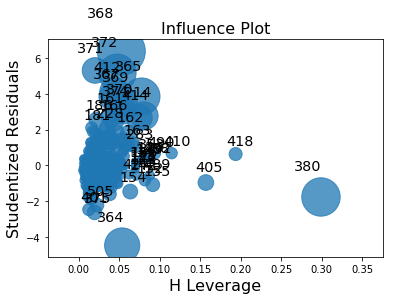

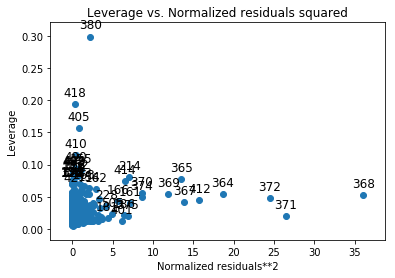

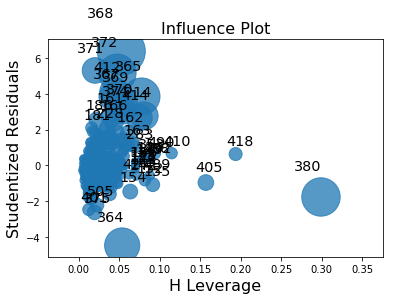

In [133]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm2)
influence_plot(lm2)

In [134]:
lm2.outlier_test(method='bonferroni')['bonferroni(p)'] .nsmallest(10).values

array([2.26479329e-07, 8.67537721e-05, 1.76008034e-04, 4.83538493e-03,
       2.36187479e-02, 6.31723510e-02, 6.81750034e-02, 1.88111289e-01,
       1.00000000e+00, 1.00000000e+00])

In [135]:
lm2.outlier_test(method='bonferroni')['bonferroni(p)'] .nsmallest(10).index   #368,371,372 are outliers

Int64Index([368, 371, 372, 364, 412, 365, 367, 369, 61, 237], dtype='int64')

In [136]:
from sklearn.svm import SVR

In [ ]:
svm=SVR(kernel='poly',C=1)
svm.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mean_squared_error(svm.predict(x_train),y_train)   #worse than linear regression 

In [20]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
mean_squared_error(ridge.predict(x_test),y_test)

14.226341242437844

In [44]:
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10]}
ridge2=GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
ridge2.fit(x_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [45]:
help(ridge2)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``scoring`` must be passed.
 |  
 |  param_grid : dict or list of dictionaries
 |      Dictionary with parameters names (string) as k

In [46]:
ridge2.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [47]:
print(ridge2.best_params_)
print(ridge2.best_score_)#negative when minimize, positive when maximize

{'alpha': 1e-15}
-25.150795844000964


In [39]:
dir(ridge2)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_estimator_type',
 '_get_param_iterator',
 '_get_param_names',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'grid_scores_',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'return_train_scor

In [43]:
ridge2.grid_scores_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -25.15080, std: 6.08875, params: {'alpha': 1e-15},
 mean: -25.15080, std: 6.08875, params: {'alpha': 1e-10},
 mean: -25.15080, std: 6.08875, params: {'alpha': 1e-08},
 mean: -25.15080, std: 6.08874, params: {'alpha': 0.0001},
 mean: -25.15082, std: 6.08868, params: {'alpha': 0.001},
 mean: -25.15108, std: 6.08808, params: {'alpha': 0.01},
 mean: -25.41097, std: 6.06172, params: {'alpha': 1},
 mean: -25.88280, std: 6.04952, params: {'alpha': 5},
 mean: -26.01933, std: 6.04739, params: {'alpha': 10}]